<a href="https://colab.research.google.com/github/shubhammulay04/Airbnb_Booking_Analysis/blob/main/Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
col_after_excluding = set(df.columns) - {'latitude', 'longitude', 'id', 'host_id'}
df[col_after_excluding].describe()

,price,availability_365,number_of_reviews,calculated_host_listings_count,reviews_per_month,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,112.781327,23.274466,7.143982,1.090910,7.029962
std,240.154170,131.622289,44.550582,32.952519,1.597283,20.510550
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,69.000000,0.000000,1.000000,1.000000,0.040000,1.000000
50%,106.000000,45.000000,5.000000,1.000000,0.370000,3.000000
75%,175.000000,227.000000,24.000000,2.000000,1.580000,5.000000
max,10000.000000,365.000000,629.000000,327.000000,58.500000,1250.000000


In [ ]:
dist_col_list = df[col_after_excluding].describe().columns.tolist()


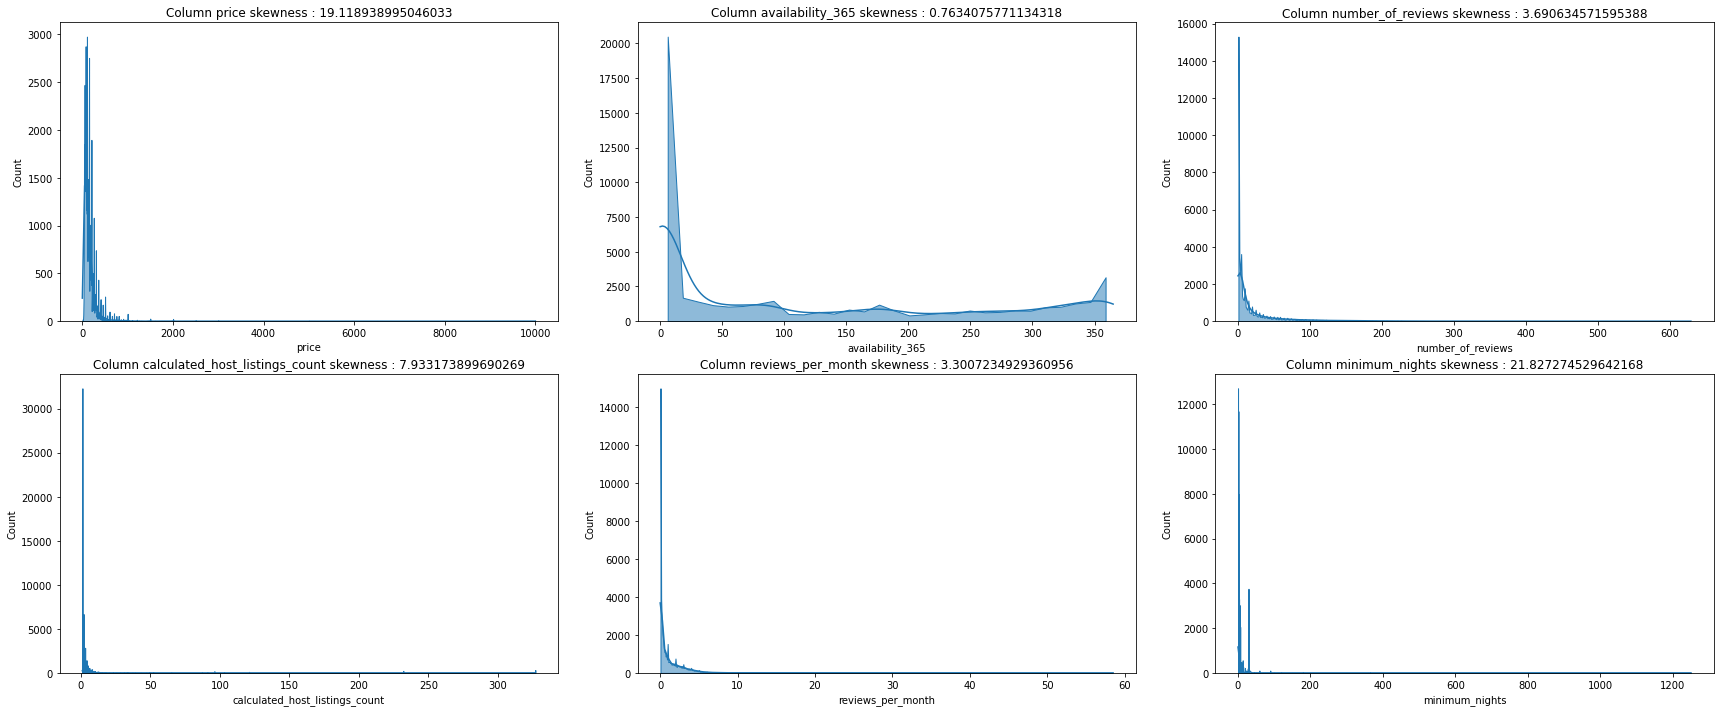

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(dist_col_list, axes):
    sns.histplot(x=col, data=df, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {df[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

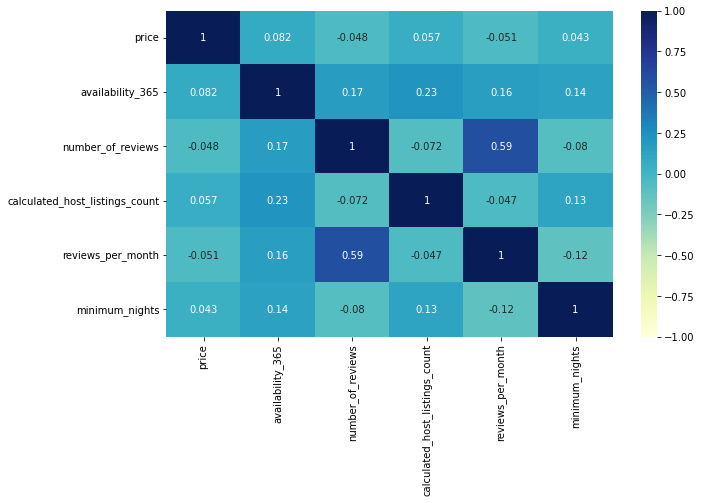

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df[dist_col_list].corr(), linewidths=0, vmin=-1, annot=True, cmap="YlGnBu")
plt.show()

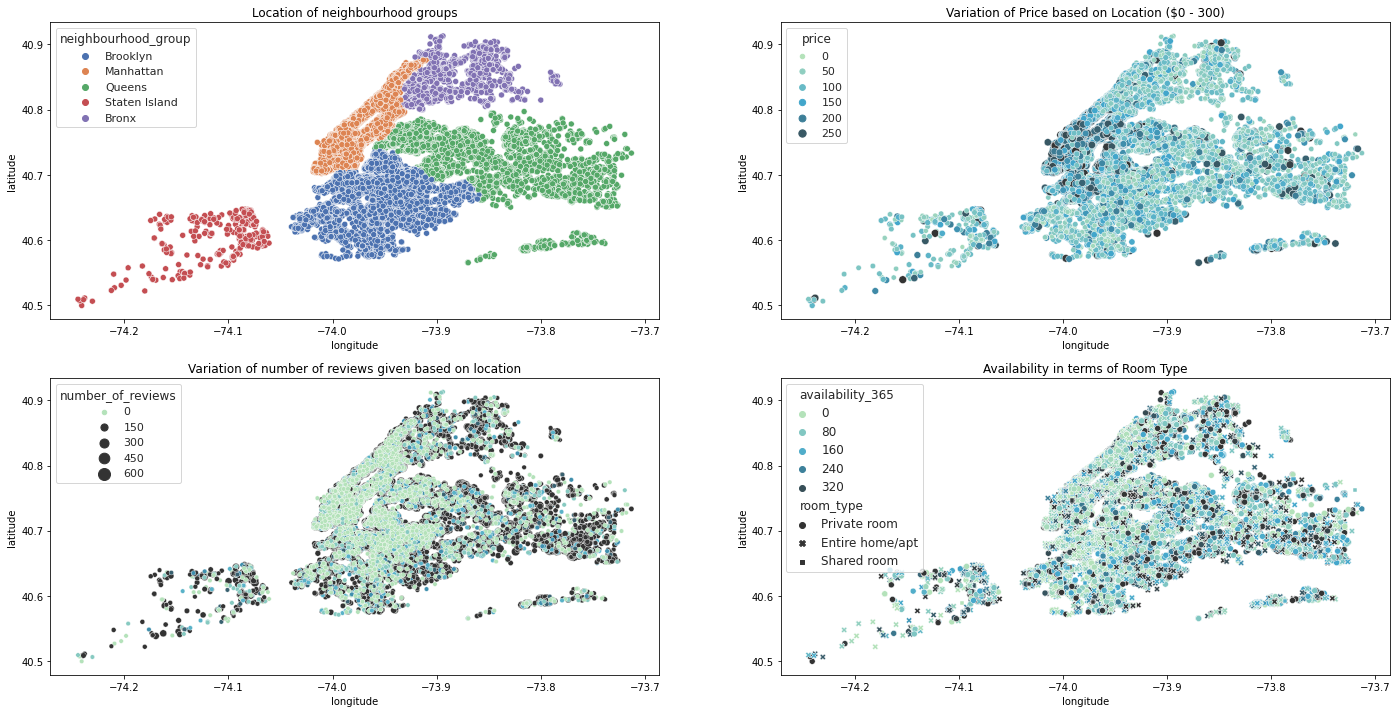

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
ax = axes.flatten()

sns.set_theme(style="white")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[0]);
ax[0].set_title('Location of neighbourhood groups')
sns.scatterplot(data=df[df['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='GnBu_d', ax=ax[1])
ax[1].set_title('Variation of Price based on Location ($0 - 300)')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[2])
ax[2].set_title('Variation of number of reviews given based on location')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[3])
ax[3].set_title('Availability in terms of Room Type')
plt.show()

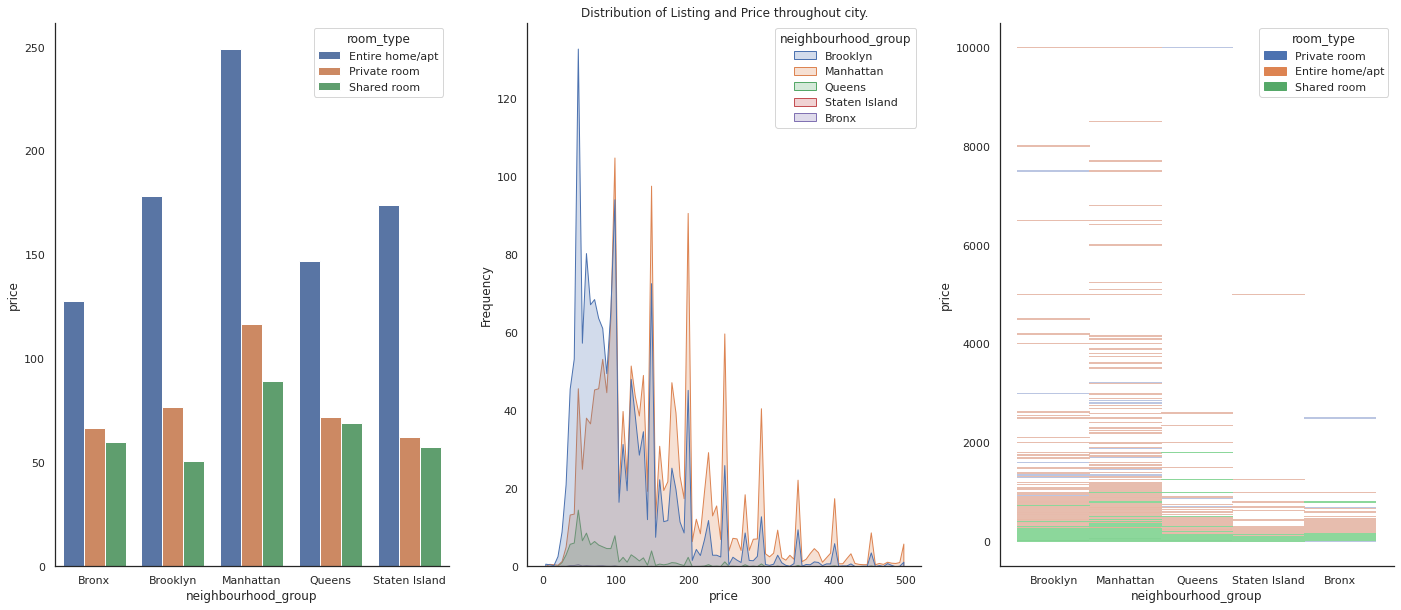

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 10))
ax = axes.flatten()

# group_price_df = df.groupby('neighbourhood_group')['price'].agg([np.max, np.mean, np.min]).reset_index()
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[0])

sns.histplot(data=df[df['price'] < 500], x="price", hue="neighbourhood_group", stat='frequency', element='poly', ax=ax[1])
sns.histplot(data=df, x='neighbourhood_group', y='price', hue='room_type', element='poly', ax=ax[2])
ax[1].set_title('Distribution of Listing and Price throughout city.')
sns.despine(fig)

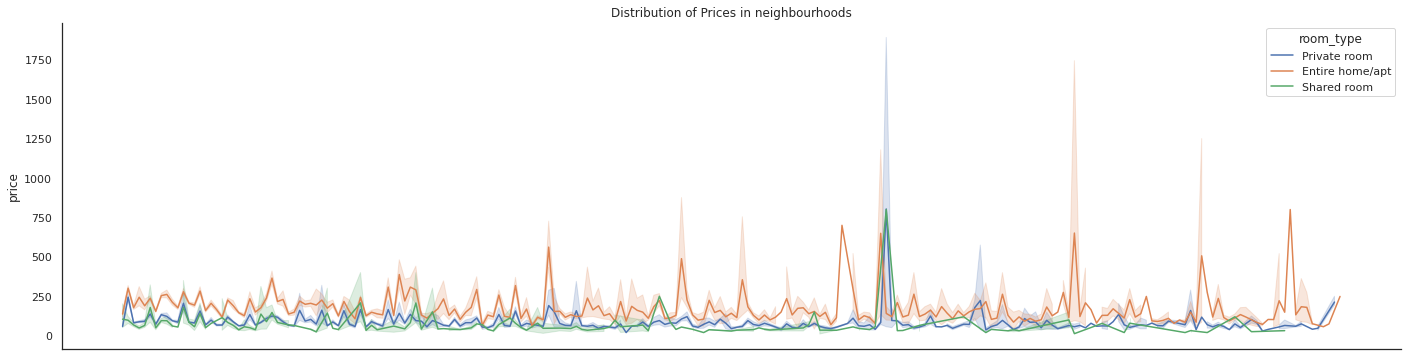

In [ ]:
fig = plt.figure(figsize=(24, 6))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
sns.lineplot(data=df, x='neighbourhood', y='price', hue='room_type')
plt.title('Distribution of Prices in neighbourhoods')
sns.despine(fig)

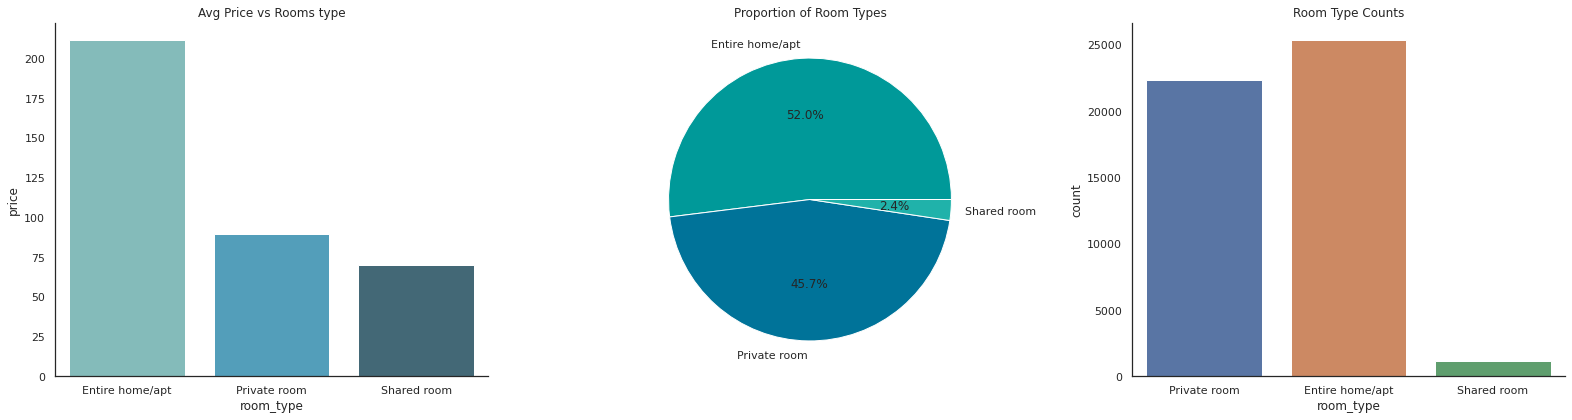

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='room_type', y='price', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Price vs Rooms type");

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'])
ax[1].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[2])
ax[2].set_title('Room Type Counts')

sns.despine(fig)
plt.tight_layout(h_pad=0.5, w_pad=0.8)

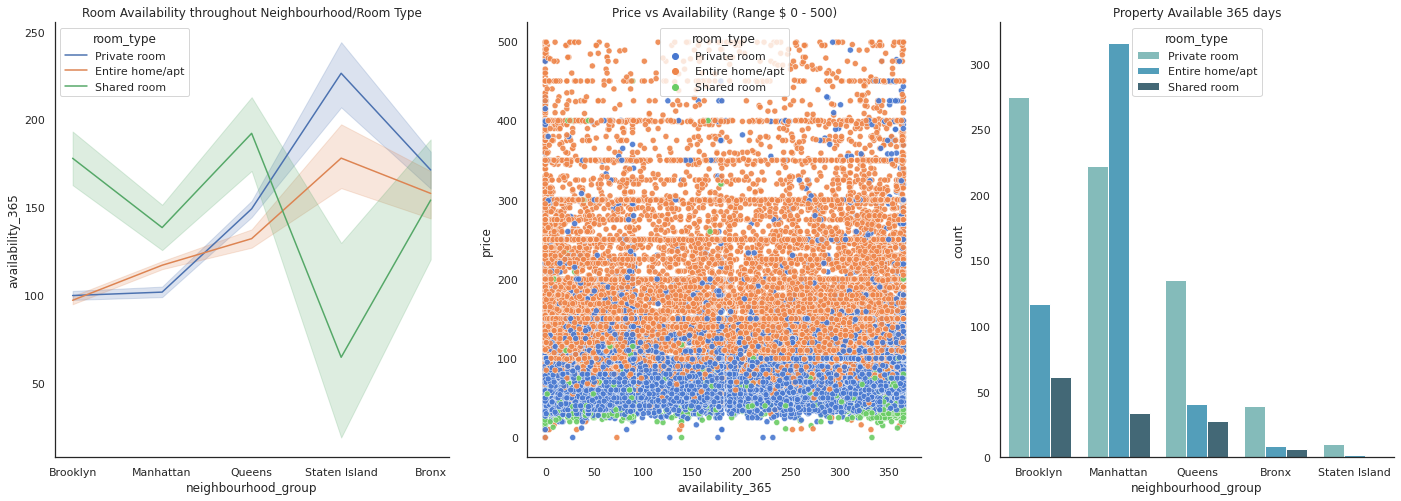

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type', ax=ax[0])
ax[0].set_title('Room Availability throughout Neighbourhood/Room Type')
sns.scatterplot(data=df[df['price'] < 500], x="availability_365", y='price', hue='room_type', alpha=.9, palette="muted", ax=ax[1])
ax[1].set_title('Price vs Availability (Range $ 0 - 500)')

sns.countplot(data=df[df['availability_365']  == 365], x='neighbourhood_group', hue='room_type', palette='GnBu_d', ax=ax[2])
ax[2].set_title('Property Available 365 days')
sns.despine(fig)

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df['Days'], df['Month'], df['Years'] = (df['last_review'].dt.day, df['last_review'].dt.month, df['last_review'].dt.year)
df['last_review'] = pd.to_datetime(df['last_review']).dt.date

In [ ]:
filtered_df = df[df['Years'] != 1970]

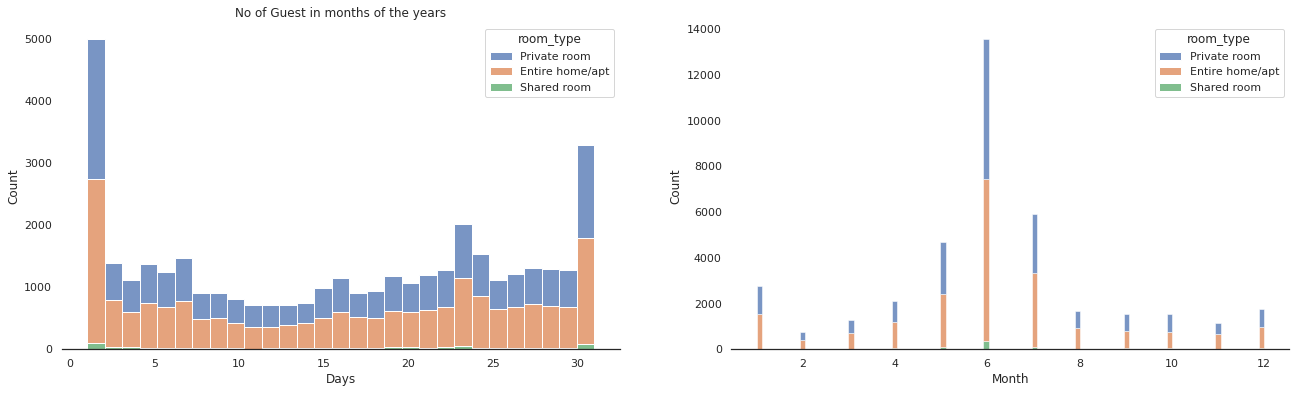

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.histplot(data=filtered_df, x='Days', hue='room_type', multiple="stack", ax=ax[0])
ax[0].set_title('No of Guest in days of the months')
sns.histplot(data=filtered_df, x='Month', hue='room_type', multiple="stack", ax=ax[1])
ax[0].set_title('No of Guest in months of the years')
sns.despine(fig, left=True)

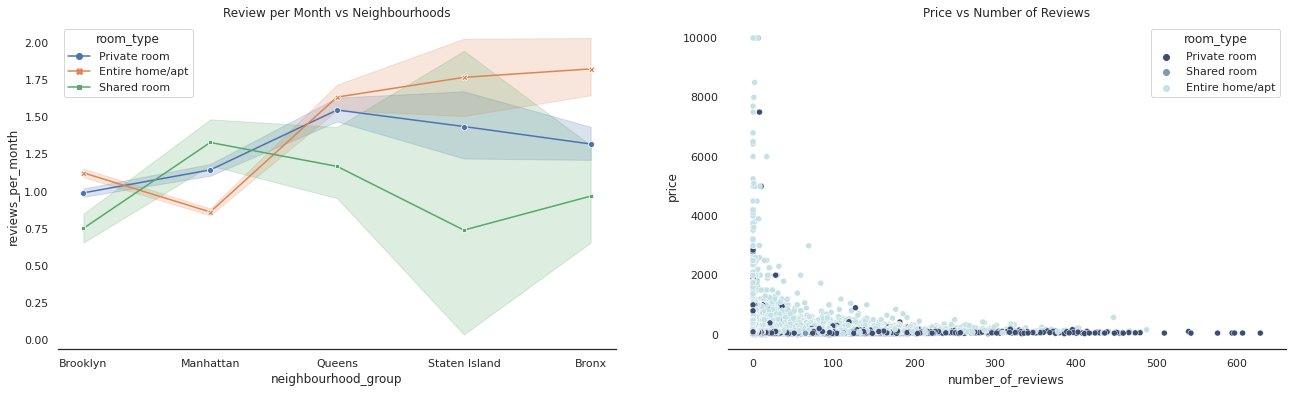

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='reviews_per_month', hue='room_type', style="room_type",
        markers=True, dashes=False, ax=ax[0])
ax[0].set_title('Review per Month vs Neighbourhoods')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r",
        hue_order=['Private room', 'Shared room', 'Entire home/apt'], ax=ax[1])
ax[1].set_title('Price vs Number of Reviews')
sns.despine(fig, left=True)


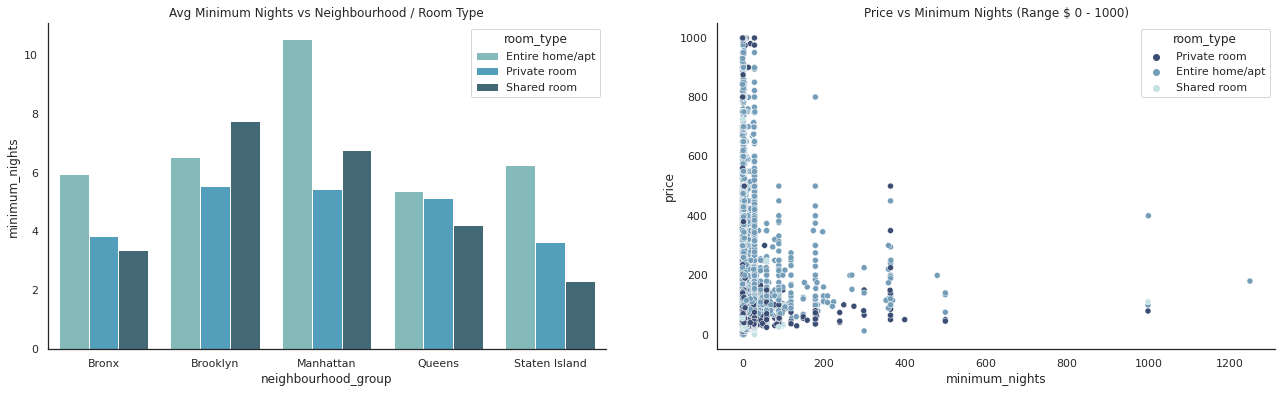

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['minimum_nights']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y='minimum_nights', hue='room_type', palette='GnBu_d', ax=ax[0])
ax[0].set_title("Avg Minimum Nights vs Neighbourhood / Room Type");

sns.scatterplot(data=df[df['price'] < 1000], x='minimum_nights', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r", ax=ax[1])
ax[1].set_title("Price vs Minimum Nights (Range $ 0 - 1000)")

sns.despine(fig)


In [ ]:
#Conclusion
#So, this AirBNB dataset is a rich in data but not on features. From the entire above analysis we can conclude that,

#Most visitors don't prefer shared rooms, they tend to visit private room or entire home.
#Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY
#Though location of property has high relation on deciding its price, but a property in popular location doesn't it will stay occupied in most of the time.
#Performing a regression on this dataset may result in high error rate, as the features given in this dataset, are of very poor quality in deciding the property valuation. We can see this by looking at corelation heatmap. We would need more features like bedrooms, bathroom, property age (guessed it'd be a very important one), tax_rate applicable on land, room extra amenities, distance to nearest hospital, stores or schoolds. These features might have a high relation with price.
#We could use a time series analysis to make prediction of occupancy rate at particular time of a month, or particukar time of a season.
#It'd be a better if we had avg guest ratings of a property, that would be beneficial in understanding the property more and could also be a factor in deciding price (a low rated property tends to lower their price)